In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

We use pandas to read the csv files. the pd.read_csv() method creates a DataFrame from a csv file.

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Checking the size of the data

In [5]:
print('Train data shape',train.shape)
print('Test data shape',test.shape)

Train data shape (1460, 81)
Test data shape (1459, 80)


In [6]:
print(train.head())
print('\n')
print(test.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

# Visualising the Data
Importing the functionality into the environment.

In [7]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10,6)

# Exploring the data
The value to predict is often called the target variable. In here its called SalesPrice.
To get more information about the sales price like count,mean,std,min,max we use describe() method.

In [8]:
print(train.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Checking for # Skewness , which is the measure of the shape of the distribution of values.

Skew is: 1.8828757597682129


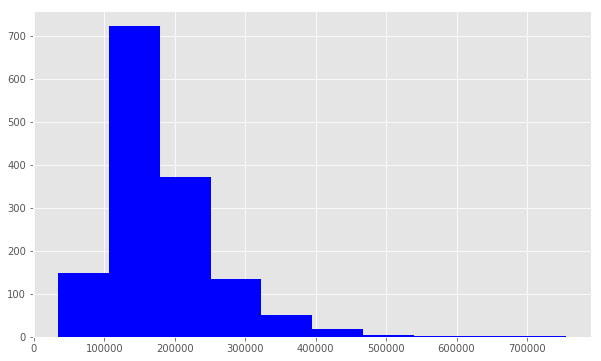

In [9]:
print('Skew is:',train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

the predictions are generated by the final model will also be log transformed. so we'll need to convert these predictions back into their original form later. np.log() will transform the variable, and np.exp() will reverse the transformation.


 Skew is : 0.12133506220520406


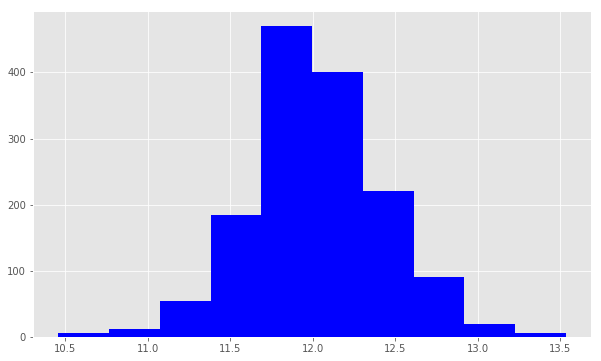

In [10]:
target = np.log(train.SalePrice)
print('\n Skew is :',target.skew())
plt.hist(target, color='blue')
plt.show()

# Feature Engineering
Feature Engineering is the process of making features of the data suitable for use in machine learning and modelling.

the DataFrame.corr() method displays the correlation between the columns, then the correlations between the features and the target.

In [11]:
numeric_features = train.select_dtypes(include= [np.number])
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


# Handling with Outliners
Let's use plt.scatter() to generate some scatter plots and visualize the relationshop between the Garage Area 'GarageArea' and 'SalePrice'

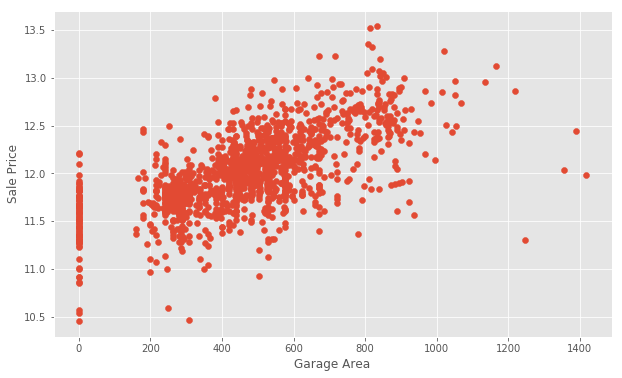

In [12]:
plt.scatter(x=train['GarageArea'],y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

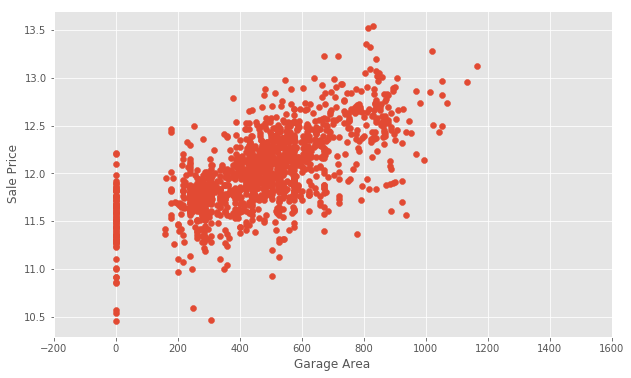

In [13]:
train = train[train['GarageArea']<1200]
# displaying the previous graph without outliners
plt.scatter(x=train['GarageArea'],y = np.log(train.SalePrice))
plt.xlim(-200,1600) # this forces the same scale as before
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

# Handling null values
i will create a DataFrame to view the top null columns. Changing together the train.isnull.sum() methods, we return a Series of counts of the null values in each column.

In [14]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending = False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
# nulls
print(nulls)

              Null Count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


# Wrangling the Non-numeric Features
View non-numeric features

In [15]:
categoricals = train.select_dtypes(exclude=[np.number])
# categoricals.describe()
print(categoricals.describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1455         1455       1455      ...            1374   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1378          225       1257      ...             867   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1374       1374       1374       1455      6    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Ex  MnPrv   
freq    

# Transforming Features
For many of these features we use one-hot encoding to make use of the information for modelling.
# One Hot Encoding 
is a technique which will transform categorical data into numbers so the model can understand whether or not a particular observation falls into one category or not.

Eg. Consider the street data, which indicates whether there is Gravel or paved road access to the property

In [16]:
print('Original:\n')
print(train.Street.value_counts(),'\n')

Original:

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [17]:
# Create a new column called enc_street. The pd.get_dummies() method will be used for this.
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [18]:
# Now we print the encoded values
print('Encoded:\n')
print(train.enc_street.value_counts())

Encoded:

1    1450
0       5
Name: enc_street, dtype: int64


Look at SaleCondition by constructing and plotting a pivot table

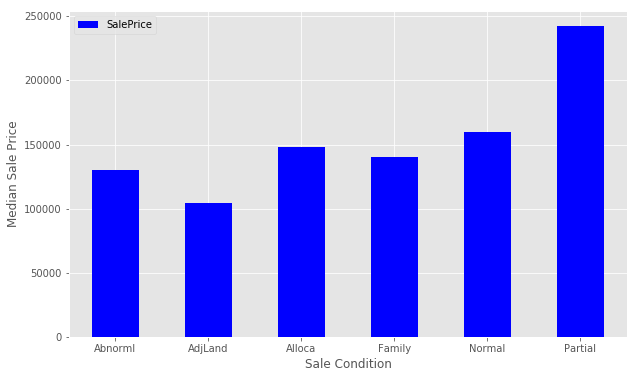

In [19]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Notice that Partial has a significantly higher Median Sale Price than the others. We will encode this as a new feature. We select all of the houses where the SaleCondition is equal to patrial and assign the value 1,otherwise assign 0.

In [20]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

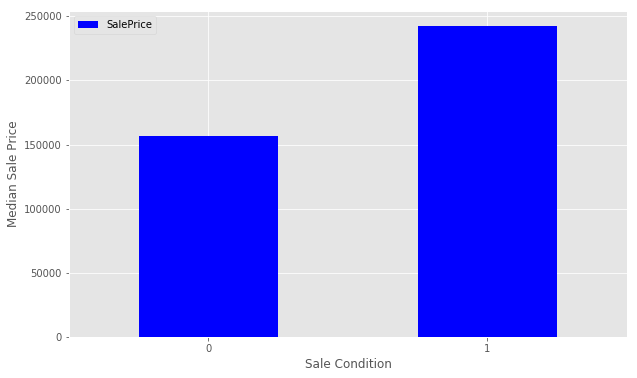

In [21]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

# Dealing with Missing Values
Ill fill the missing values with an average value and then assign the results to data. This is a method of interpolation.

In [22]:
data=train.select_dtypes(include=[np.number]).interpolate().dropna()

In [23]:
# Check if the all of the columns have 0 null values
#sum(data.isnull().sum() != 0)
print(sum(data.isnull().sum() != 0))

0


# Building a Linear Model
Seperate the features and the target variable for modelling. i will assign the features of X and the target variable to Y.
I use np.log() as explained above to transform the y variable for the model. data.drop([feature],axis =1) tells pandas which columns we want to exclude.

In [24]:
# SalePrice is the target variable. and id is just an index with no relationship to SalePrice
y=np.log(train.SalePrice)
x=data.drop(['SalePrice','Id'],axis =1)

## Partition the Data
partioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before. if we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.
Also, I have to state what proportion of the data should be in the test partition from train data set. In this example , about 33% of the data is devoted to the hold-out set

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42, test_size=(1/3))

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42, test_size=(1/3))

## Create a Linear Regression Model
First instantiate the model.

In [26]:
lr=linear_model.LinearRegression()

THen we need to fit the model. This is to estimate the relationship between our predictors and the target variable so we can make accurate predictions on new data. 

In [27]:
model = lr.fit(x_train,y_train)

# [5] Evaluate the Performance
The r-squared value is a measure of how close the data are to be fitted regression line. it takes a value between 0 and 1, 1 meaning that all the variance in the target is explained by the data.
In general, a higher r-squared value means a better fit.
The model.score() method returns the r-squared value by default.

In [29]:
print('R^2 is :\n',model.score(x_test,y_test))

R^2 is :
 0.8825873992631015


Calculating the root mean squared error, use the model to make predictions on the test data set.
The mean_squared_root function takes two arrays and calculate the rmse.

In [30]:
predictions = model.predict(x_test)

In [31]:
print('RMSE is :\n', mean_squared_error(y_test,predictions))

RMSE is :
 0.01862204017267289


The RMSE measures the distance between the predicted values and actual values.
We can view this relationship graphically with a scatter plot.

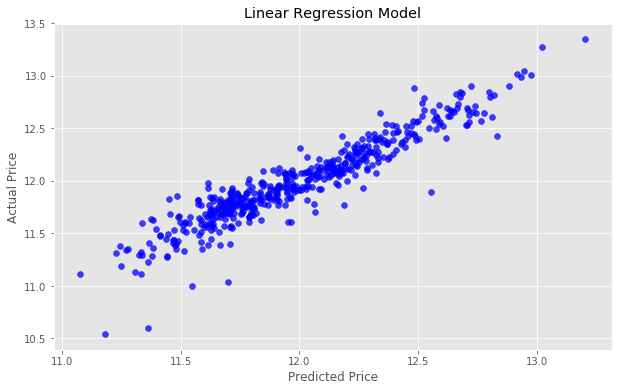

In [32]:
actual_values = y_test
plt.scatter(predictions, actual_values,alpha=0.75,color = 'b') # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()


# [6] Improve the model
Try to use Ridge Regression to decrease the influence of less important features.
Ridge Regression is a process which shrinks the regression coefficients of less important features.

I have to once again instantiate the model. The Ridge Regression model takes a parameter, alpham which controls the strength of the regularization. 'alpha' is a hyper parameter.

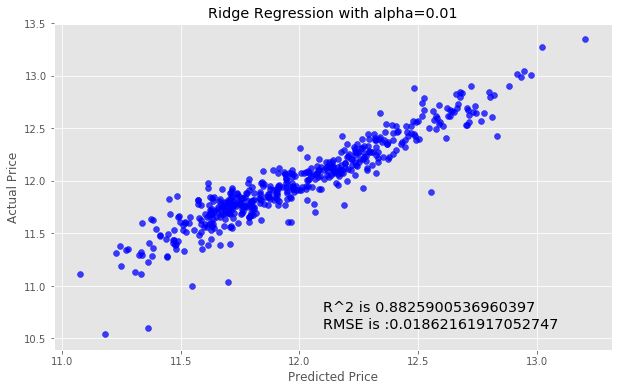

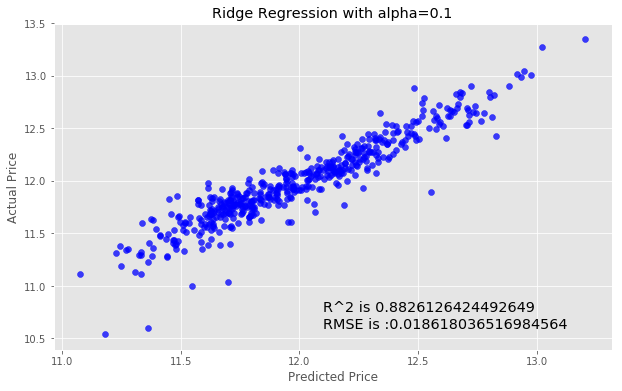

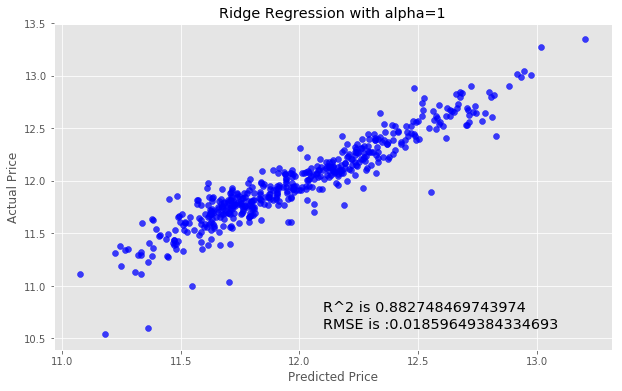

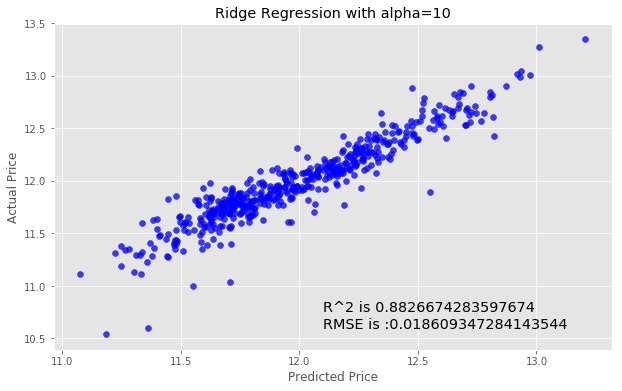

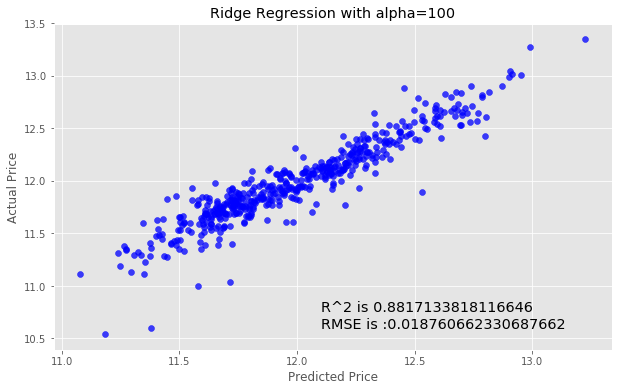

In [33]:
for i in range(-2,3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(x_train,y_train)
    preds_ridge = ridge_model.predict(x_test)
    
    plt.scatter(preds_ridge,actual_values,alpha=0.75,color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regression with alpha={}'.format(alpha))
    overlay = 'R^2 is {}\nRMSE is :{}'.format(ridge_model.score(x_test,y_test),mean_squared_error(y_test,preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

These model perform almost identically to the first model. In this case,adjusting the alpha did not substantially improve the model.

# [7] Visualize the Result and Submit the .csv file
Create a csv file that contains the predicted SalePrice for each observation in the test.csv dataset.
The first column must contain the ID from the test data.

In [34]:
submission = pd.DataFrame()
# The first column must contain the ID from the test data
submission['Id']=test.Id

Select the features from the test data for the model.

In [35]:
feats = test.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

Generate predictions

In [36]:
predictions = model.predict(feats)

transform the predictions to the correct form. We want to reverse log, we do exp(). SO I will apply np.exp() to my predictions because I jave taken the logarithm previously.

In [37]:
final_predictions = np.exp(predictions)

Now, we can see the difference.I will just demonstrate only 10 records.

In [38]:
print('Original Prediction are: \n',predictions[:10],'\n')
print('Final Predictions are: \n',final_predictions[:10])

Original Prediction are: 
 [11.76844992 11.719066   12.07422825 12.20182012 12.11518648 12.05616074
 12.15718279 12.01606301 12.17275178 11.66282685] 

Final Predictions are: 
 [129113.85840896 122892.59049591 175295.47308606 199151.30032013
 182624.33069594 172156.76114796 190457.20342295 165390.2323589
 193445.63121058 116171.9678275 ]


Assign the predictions to final result.

In [39]:
submission['SalePrice']=final_predictions

In [40]:
#Check the head records of the results to make sure that everything looks good.
print(submission.head())

     Id      SalePrice
0  1461  129113.858409
1  1462  122892.590496
2  1463  175295.473086
3  1464  199151.300320
4  1465  182624.330696


I will use DataFrame.to_csv() to create and to export results to a .csv file . I will pass index=False because Otherwise pandas will create its own index

In [41]:
submission.to_csv('submission1.csv',index=False)